In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import requests
from bs4 import BeautifulSoup as BS

In [2]:
works = pd.read_csv('../data/works.csv')
tags = pd.read_csv('../data/tags.csv')

def tags_dict():
    print("tags data dict:")
    print("tag ID")
    print("tag type (e.g. Warning, Fandom, Relationship)")
    print("tag name (unless the tag has fewer than 5 uses)")
    print("canonical or not")
    print("an approximate number of uses")
    print("merger ID (i.e. the tag's canonical version, if it has one)")


def works_dict():
    print("works data dict:")
    print("creation date")
    print("language")
    print("word count")
    print("restricted or not")
    print("complete or not")
    print("associated tag IDs")

In [3]:
mv_tag = tags.loc[tags['name'].astype('string').str.contains('Marvel')].sort_values(by='cached_count', ascending=False)['id'].values[0]

In [4]:
mv_works = works.loc[works['tags'].astype('string').str.contains(str(mv_tag))]

In [5]:
mv_works['year'] = mv_works['creation date'].str[:4]
mv_works['month'] = mv_works['creation date'].str[5:7]
mv_works['sm_date'] = mv_works['creation date'].str[0:7]
mv_works

C:\Users\isiyb\AppData\Local\Temp\ipykernel_15696\786147599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_works['year'] = mv_works['creation date'].str[:4]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_15696\786147599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_works['month'] = mv_works['creation date'].str[5:7]
C:\Users\isiyb\AppData\Local\Temp\ipykernel_15696\786147599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,creation date,language,restricted,complete,word_count,tags,Unnamed: 6,year,month,sm_date
0,2021-02-26,en,False,True,388.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN,2021,02,2021-02
7,2021-02-26,en,False,True,267.0,10+414093+1001939+4577144+1499536+110+4682892+...,NaN,2021,02,2021-02
17,2021-02-26,en,False,True,465.0,10+414093+1001939+11725627+14172+17783475+5345...,NaN,2021,02,2021-02
23,2021-02-26,en,False,True,425.0,10+414093+1001939+5075896+18059+110+176+548628...,NaN,2021,02,2021-02
28,2021-02-26,en,False,True,531.0,10+414093+1001939+5075896+18059+579450+7267+46...,NaN,2021,02,2021-02
...,...,...,...,...,...,...,...,...,...,...
7222304,2010-01-24,en,False,True,6270.0,11+2246+16+3132+5358+10477+3175+430+19213+184+...,NaN,2010,01,2010-01
7258597,2009-11-16,en,False,True,6920.0,11+21+70+77+3175+184+16+226657+414093,NaN,2009,11,2009-11
7259056,2009-11-16,en,False,True,4698.0,23+16+21300+3175+1469+2298+25324+11+226657+414...,NaN,2009,11,2009-11
7263298,2009-11-13,en,False,True,563.0,21+233+184+626+10213+3132+10641+3174+16+10+266...,NaN,2009,11,2009-11


In [6]:
mv_sm_dates = mv_works['sm_date'].value_counts().to_frame().reset_index()

In [7]:
mv_sm_dates = mv_sm_dates.sort_values(by='sm_date')

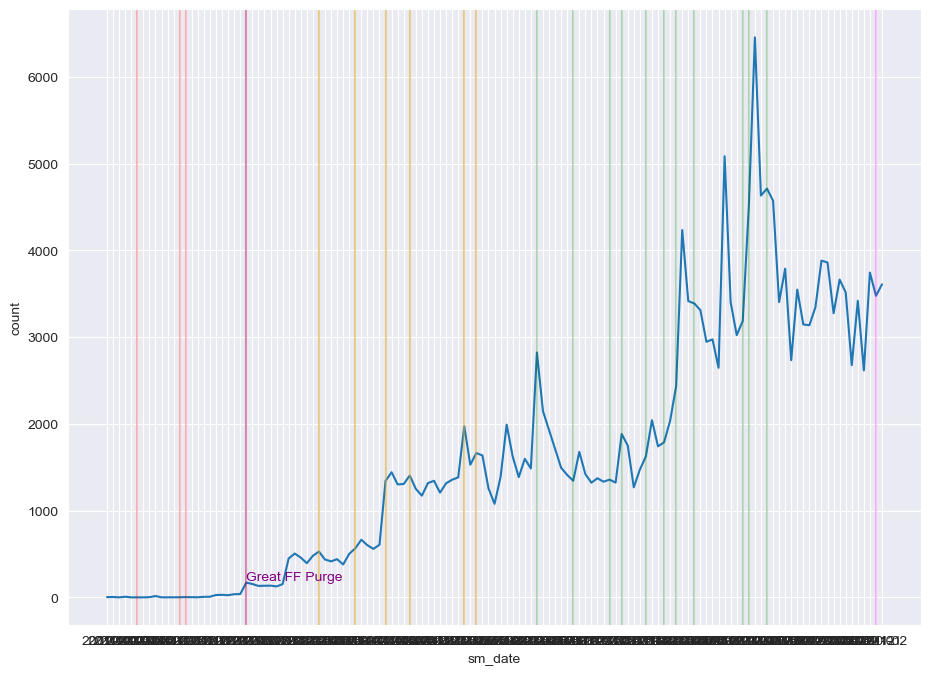

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(11, 8), dpi=100)
sns.lineplot(data=mv_sm_dates, x=mv_sm_dates['sm_date'], y=mv_sm_dates['count'])
plt.axvline(x='2010-05', color='red', alpha=0.25)
plt.axvline(x='2011-05', color='red', alpha=0.25)
plt.axvline(x='2011-07', color='red', alpha=0.25)
plt.axvline(x='2012-05', color='red', alpha=0.25)
plt.axvline(x='2013-05', color='goldenrod', alpha=0.5)
plt.axvline(x='2013-11', color='goldenrod', alpha=0.5)
plt.axvline(x='2014-04', color='goldenrod', alpha=0.5)
plt.axvline(x='2014-08', color='goldenrod', alpha=0.5)
plt.axvline(x='2015-05', color='goldenrod', alpha=0.5)
plt.axvline(x='2015-07', color='goldenrod', alpha=0.5)
plt.axvline(x='2016-05', color='green', alpha=0.25)
plt.axvline(x='2016-11', color='green', alpha=0.25)
plt.axvline(x='2017-05', color='green', alpha=0.25)
plt.axvline(x='2017-07', color='green', alpha=0.25)
plt.axvline(x='2017-11', color='green', alpha=0.25)
plt.axvline(x='2018-02', color='green', alpha=0.25)
plt.axvline(x='2018-04', color='green', alpha=0.25)
plt.axvline(x='2018-07', color='green', alpha=0.25)
plt.axvline(x='2019-03', color='green', alpha=0.25)
plt.axvline(x='2019-04', color='green', alpha=0.25)
plt.axvline(x='2019-07', color='green', alpha=0.25)
plt.axvline(x='2021-01', color='magenta', alpha=0.25)
plt.axvline('2012-05', color='purple', label='Great FF Purge', alpha=0.25)
plt.text(x = '2012-05', y = 200, s = 'Great FF Purge', color = 'purple')
#plt.annotate('Great FF Purge', xy = ('2012-05', 700))
plt.show()

In [10]:
URL = 'https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films'
response = requests.get(URL)

In [11]:
response

<Response [200]>

In [13]:
soup = BS(response.text)
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Marvel Cinematic Universe films - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

In [15]:
soup.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable plainrowheaders defaultcenter col2left" style="width: 99%;">
<caption><style data-mw-deduplicate="TemplateStyles:r1152813436">.mw-parser-output .sr-only{border:0;clip:rect(0,0,0,0);clip-path:polygon(0px 0px,0px 0px,0px 0px);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;white-space:nowrap}</style><span class="sr-only">Films of Phase One</span>
</caption>
<tbody><tr>
<th scope="col">Film<sup class="reference" id="cite_ref-DigitalSpyPhases_32-1"><a href="#cite_note-DigitalSpyPhases-32"><span class="cite-bracket">[</span>31<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">U.S. release date
</th>
<th scope="col">Director
</th>
<th scope="col">Screenwriter(s)
</th>
<th scope="col">Producer(s)
</th></tr>
<tr>
<th scope="row"><i><a href="/wiki/Iron_Man_(2008_film)" title="Iron Man (2008 film)">Iron Man</a></i>
</th>
<td>May 2, 2008<span style="display: none;"> (<span class="bday dtstart published updated itvstart">2008-05

In [18]:
phase1 = pd.read_html(str(soup.find('table', attrs={'class' : 'wikitable'})))[0]
phase1

C:\Users\isiyb\AppData\Local\Temp\ipykernel_15696\3293111007.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  phase1 = pd.read_html(str(soup.find('table', attrs={'class' : 'wikitable'})))[0]


,Film[31],U.S. release date,Director,Screenwriter(s),Producer(s)
0,Iron Man,"May 2, 2008",Jon Favreau[34],Mark Fergus & Hawk Ostby and Art Marcum & Matt...,Avi Arad and Kevin Feige
1,The Incredible Hulk,"June 13, 2008",Louis Leterrier[36],Zak Penn[37],"Avi Arad, Gale Anne Hurd, and Kevin Feige"
2,Iron Man 2,"May 7, 2010",Jon Favreau[38],Justin Theroux[39],Kevin Feige
3,Thor,"May 6, 2011",Kenneth Branagh[40],Ashley Edward Miller & Zack Stentz and Don Pay...,Kevin Feige
4,Captain America: The First Avenger,"July 22, 2011",Joe Johnston[42],Christopher Markus & Stephen McFeely[43],Kevin Feige
5,The Avengers,"May 4, 2012",Joss Whedon[44],Joss Whedon[44],Kevin Feige


In [22]:
phase2 = pd.read_html(str(soup.find_all('table', attrs={'class' : 'wikitable'})))[1]
phase2

C:\Users\isiyb\AppData\Local\Temp\ipykernel_15696\78128720.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  phase2 = pd.read_html(str(soup.find_all('table', attrs={'class' : 'wikitable'})))[1]


,Film[31],U.S. release date,Director(s),Screenwriter(s),Producer
0,Iron Man 3,"May 3, 2013",Shane Black[45],Drew Pearce and Shane Black[45][46],Kevin Feige
1,Thor: The Dark World,"November 8, 2013",Alan Taylor[47],Christopher L. Yost and Christopher Markus & S...,Kevin Feige
2,Captain America: The Winter Soldier,"April 4, 2014",Anthony and Joe Russo[49],Christopher Markus & Stephen McFeely[50],Kevin Feige
3,Guardians of the Galaxy,"August 1, 2014",James Gunn[51],James Gunn and Nicole Perlman[52],Kevin Feige
4,Avengers: Age of Ultron,"May 1, 2015",Joss Whedon[53],Joss Whedon[53],Kevin Feige
5,Ant-Man,"July 17, 2015",Peyton Reed[54],Edgar Wright & Joe Cornish and Adam McKay & Pa...,Kevin Feige


In [23]:
phase3 = pd.read_html(str(soup.find_all('table', attrs={'class' : 'wikitable'})))[2]
phase3

C:\Users\isiyb\AppData\Local\Temp\ipykernel_15696\429945793.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  phase3 = pd.read_html(str(soup.find_all('table', attrs={'class' : 'wikitable'})))[2]


,Film[31],U.S. release date,Director(s),Screenwriter(s),Producer(s)
0,Captain America: Civil War,"May 6, 2016",Anthony and Joe Russo[56],Christopher Markus & Stephen McFeely[56],Kevin Feige
1,Doctor Strange,"November 4, 2016",Scott Derrickson[57],Jon Spaihts and Scott Derrickson & C. Robert C...,Kevin Feige
2,Guardians of the Galaxy Vol. 2,"May 5, 2017",James Gunn[52],James Gunn[52],Kevin Feige
3,Spider-Man: Homecoming,"July 7, 2017",Jon Watts[59],Jonathan Goldstein & John Francis Daley and Jo...,Kevin Feige and Amy Pascal
4,Thor: Ragnarok,"November 3, 2017",Taika Waititi[61],Eric Pearson and Craig Kyle & Christopher L. Y...,Kevin Feige
5,Black Panther,"February 16, 2018",Ryan Coogler[64],Ryan Coogler & Joe Robert Cole[65][66],Kevin Feige
6,Avengers: Infinity War,"April 27, 2018",Anthony and Joe Russo[67],Christopher Markus & Stephen McFeely[68],Kevin Feige
7,Ant-Man and the Wasp,"July 6, 2018",Peyton Reed[69],Chris McKenna & Erik Sommers and Paul Rudd & A...,Kevin Feige and Stephen Broussard
8,Captain Marvel,"March 8, 2019",Anna Boden & Ryan Fleck[71],Anna Boden & Ryan Fleck & Geneva Robertson-Dwo...,Kevin Feige
9,Avengers: Endgame,"April 26, 2019",Anthony and Joe Russo[67],Christopher Markus & Stephen McFeely[68],Kevin Feige


In [24]:
phase1['release_dt'] = pd.to_datetime(phase1['U.S. release date'])
phase1

,Film[31],U.S. release date,Director,Screenwriter(s),Producer(s),release_dt
0,Iron Man,"May 2, 2008",Jon Favreau[34],Mark Fergus & Hawk Ostby and Art Marcum & Matt...,Avi Arad and Kevin Feige,2008-05-02
1,The Incredible Hulk,"June 13, 2008",Louis Leterrier[36],Zak Penn[37],"Avi Arad, Gale Anne Hurd, and Kevin Feige",2008-06-13
2,Iron Man 2,"May 7, 2010",Jon Favreau[38],Justin Theroux[39],Kevin Feige,2010-05-07
3,Thor,"May 6, 2011",Kenneth Branagh[40],Ashley Edward Miller & Zack Stentz and Don Pay...,Kevin Feige,2011-05-06
4,Captain America: The First Avenger,"July 22, 2011",Joe Johnston[42],Christopher Markus & Stephen McFeely[43],Kevin Feige,2011-07-22
5,The Avengers,"May 4, 2012",Joss Whedon[44],Joss Whedon[44],Kevin Feige,2012-05-04


In [25]:
phase1['release_dt'].diff()

0        NaT
1    42 days
2   693 days
3   364 days
4    77 days
5   287 days
Name: release_dt, dtype: timedelta64[ns]

In [26]:
phase2['release_dt'] = pd.to_datetime(phase2['U.S. release date'])
phase2['release_dt'].diff()

0        NaT
1   189 days
2   147 days
3   119 days
4   273 days
5    77 days
Name: release_dt, dtype: timedelta64[ns]

In [27]:
phase3['release_dt'] = pd.to_datetime(phase3['U.S. release date'])
phase3['release_dt'].diff()

0         NaT
1    182 days
2    182 days
3     63 days
4    119 days
5    105 days
6     70 days
7     70 days
8    245 days
9     49 days
10    67 days
Name: release_dt, dtype: timedelta64[ns]